# Hola &#x1F600;,

Soy **Hesus Garcia** – , tu revisor de confianza, también conocido como **"El Hesus que lleva la H de 'héroe' del código" 🦸‍♂️**. Sí, soy el único Hesus con H que te ayudará a llevar tu trabajo al siguiente nivel. Estoy preparado con observaciones y sugerencias que harán que tu proyecto destaque y esté a la altura de las mejores prácticas en desarrollo. ¡Prepárate para mejorar y brillar en el mundo del código! 🚀

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

--- 

Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


# introducción 
vamos a ir analizando los datos al parecer; vamos a trabajar con el comportamiento de los usuarios frente al lanzamiento de una plataforma, observando distintos factores que favorecen o no las páginas, a la par de determinar análisis de marketing, acompañenme.

# Paso 1. Acceda los datos y prepáralos para el análisis

# importación de librerías, necesarias para el manejo de los datos.

In [148]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [149]:
# vamos a leer los df; asignandole un nombre a cada uno. 
visits=pd.read_csv('/datasets/visits_log_us.csv')
orders=pd.read_csv('/datasets/orders_log_us.csv') 
costs=pd.read_csv('/datasets/costs_us.csv')




In [150]:
visits.describe()

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


- la media y la mediana están ligeramente cerca lo que nos indica una tendencia lineal.
- al parecer nuestros datos presentan valores atípicos de acuerdo a la diferencia del valor max - min 

- en sí los datos presentan una tendencia lineal con una ligera asimetría, como también hay presencia de valores atípicos entre lo datos; sin embargo la desviación estándar moderada sugiere que los datos no son extremadamente volátiles.

In [151]:
#revisaremos la información a detalle; con el métode .info() y head(), con el fin de conocer los datos 
visits.info()
print()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB



,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


- primero visualizamos; los nombres de las columnas inician  en mayuscúla y tiene espacio entre los nombres; de repente esto puede manifestarse como algo tedioso a través del desarrollo del proyecto, en  ese orden de ideas vamos a corregirlo colocando un _ entre los nombres y pasando a minuscúlas los mismos, haciendo uso de los métodos .str.replace() y .str.lower()

- en este punto observamos que las dos columnas señaladas 'End Ts', 'Start Ts', su tipo de dato actual no corresponde con el cotenido de la columna, ya que son fechas y está como object, así que vamos a realizar una modificación con respecto al tipo de datos, para poder intervenir está columna; más a delante seguramente la vamos a necesitar. Haciendo uso de la función to_datetime().

In [152]:
visits.columns =visits.columns.str.lower().str.replace(' ', '_')

In [153]:
visits['end_ts']=pd.to_datetime(visits['end_ts'], format='%Y-%m-%d %H:%M')
print()
visits['start_ts']=pd.to_datetime(visits['start_ts'], format='%Y-%m-%d %H:%M')
visits.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [154]:
orders.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


- bueno en este data los datos de media y mediana si se observa una diferencia importante(los datos pueden estar distribuidos de manera asimétrica), y la desviación estándar es alta; de acuerdo a esto nos indica que se podria presentar una tendencia no lineal; además de la diferencia del valor min-max que es muy notable indica la presencia de valores atípicos.

In [155]:
orders.info()
print()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB



,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


- verificamos nuevamente la misma situación del df anterior, cnvertimos el tipo de objeto al correcto, y reparamos los nombres de las columnas a lo adecuado.

In [156]:
orders.columns=orders.columns.str.lower().str.replace(' ', '_')

In [157]:
orders['buy_ts']=pd.to_datetime(orders['buy_ts'], format='%Y-%m-%d %H:%M')
print()
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [158]:
costs.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


- bueno en este df los valores parece estar menos agresivos que en el anterior; observamos una media y mediana ligeramente diferente(cierta asimetría en los valores), una desviación estándar moderadamente alta para con los datos(lo que sugiere que tiene una variabilidad razonable, dentro de los valores min-max se aprecia una diferencia notable lo que nos indica presencia de valores atípicos.

In [159]:
costs.info()
print()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB



,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


está al parecer con el nombre de las columnas esta en orden de acuerdo a nuestro método de trabajo; ajustaremos el tipo de fecha y quedaria listo.

In [160]:
costs['dt']=pd.to_datetime(costs['dt'])
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


- al parecer en primera medida no hay valores null o ausentes, sin embargo vamos a verificar y depurar la calidad de los datos haciendo uso del método isnull() y duplicated()

In [161]:
visits.isnull().sum()

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64

In [162]:
orders.isnull().sum()

buy_ts     0
revenue    0
uid        0
dtype: int64

In [163]:
costs.isnull().sum()

source_id    0
dt           0
costs        0
dtype: int64

- hasta aquí nuestros datos están super limpios que bíen!

In [164]:
visits.duplicated().sum()

0

In [165]:
orders.duplicated().sum()

0

In [166]:
costs.duplicated().sum()

0

- magnifíco están limpios.
- Bueno mi querido publico hasta aquí hemos hecho un gran trabajo preparando y depurando los datos para iniciar el proyecto, en hora buena! iniciemos.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Realizaste un excelente trabajo organizando y depurando los datos. La limpieza de nombres de columnas y la conversión de formatos de fecha muestran atención a los detalles, y el uso de funciones como `isnull()` y `duplicated()` asegura que los datos sean consistentes y utilizables. </div> <div class="alert alert-block alert-warning"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Atención</b> ⚠️ - Sería útil consolidar tus observaciones (e.g., valores atípicos, desviación estándar) en una tabla resumen o una lista, en lugar de describirlas en texto plano. Esto haría más eficiente la revisión y referencia de esta sección. Además, podrías agregar más comentarios sobre cómo manejarías valores atípicos en pasos futuros. </div>

# Paso 2. Haz informes y calcula métricas 

Visitas:

- ¿Cuántas personas lo usan cada día, semana y mes?
- ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).
- ¿Cuál es la duración de cada sesión?
- ¿Con qué frecuencia los usuarios regresan?

Usuarios diarios:
             count  nunique
start_ts                  
2017-06-01    664      605
2017-06-02    658      608
2017-06-03    477      445
2017-06-04    510      476
2017-06-05    893      820
...           ...      ...
2018-05-27    672      620
2018-05-28   1156     1039
2018-05-29   1035      948
2018-05-30   1410     1289
2018-05-31   2256     1997

[364 rows x 2 columns]


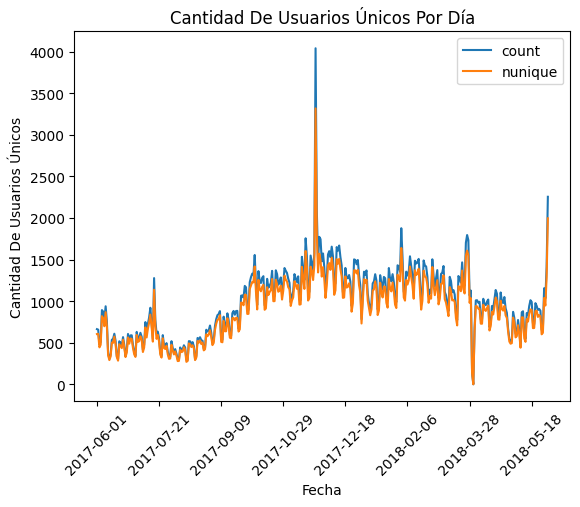

In [167]:
# 1. ¿Cuántas personas lo usan cada día, semana y mes?
#usuarios diarios;
daily_users = visits.groupby(visits['start_ts'].dt.strftime('%Y-%m-%d'))['uid'].agg(['count','nunique'])
print("Usuarios diarios:\n", daily_users)

daily_users.plot(kind='line')
plt.xticks(rotation=45)
plt.title('Cantidad De Usuarios Únicos Por Día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad De Usuarios Únicos')
plt.show()

- Observamos que entre el día 29 de octubre del 2017 y el 18 de diciembre del 2017 hay una fuerte brecha de inicio de seción por parte de los usuarios; además que a partir de está fecha los usuarios empiezan a involucrarse más con la pltaforma, o por lo menos a tener una ligera constante de interacción, que el resto de días anteriores a la fecha mencionada; hasta nuevamente el 18 de mayo del siguiente año.

           count  nunique
week year                
1    2018   8057     6918
2    2018   7871     6703
3    2018   8317     6972
4    2018   8488     7060
5    2018   9796     8111
6    2018   9407     7908
7    2018   9272     7759
8    2018   8930     7518
9    2018   8771     7395
10   2018   8147     6844
11   2018   7489     6225
12   2018   9393     7898
13   2018   5862     4940
14   2018   6242     5383
15   2018   6382     5494
16   2018   6768     5740
17   2018   6574     5503
18   2018   4496     3916
19   2018   4803     4128
20   2018   6094     5070
21   2018   5934     4995
22   2017   2309     2021
     2018   5857     4892
23   2017   4931     4129
24   2017   3214     2812
25   2017   3273     2878
26   2017   3514     3064
27   2017   3822     3294
28   2017   5105     4355
29   2017   4574     3841
30   2017   3072     2655
31   2017   2729     2364
32   2017   2782     2444
33   2017   3128     2746
34   2017   3585     3116
35   2017   4296     3694
36   2017   

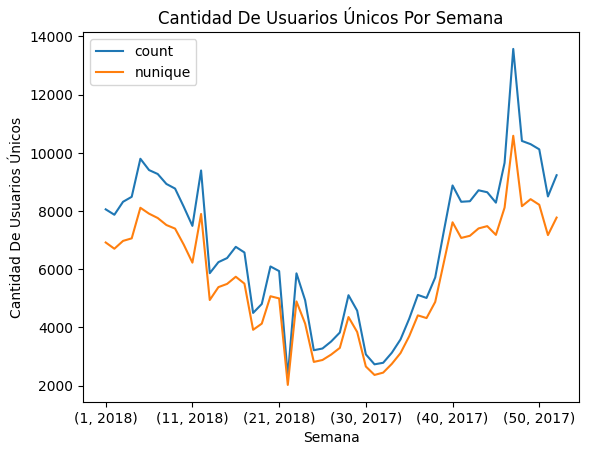

In [168]:
# Usuarios semanales
weekly_users = visits.groupby([visits['start_ts'].dt.isocalendar().week, visits['start_ts'].dt.isocalendar().year])['uid'].agg(['count','nunique'])
print(weekly_users)

weekly_users.plot(kind='line')
plt.title('Cantidad De Usuarios Únicos Por Semana')
plt.xlabel('Semana')
plt.ylabel('Cantidad De Usuarios Únicos')
plt.show()


- Bueno con los usuarios semanales observamos que en la primera semana aún en la número once se aprecia un alza en el inicio de sesión sobre el año 2018; a partir de la misma inicia un decrecimiento bastante fuerte entre la 21 del 2018 hasta la semana 30 y 40 del 2017, a partir ya de la misma comienza la actividad más importante en las plataformas alcanzando picos considerables dentro de la semana 50 del 2017.

- deduciendo de una manera mas general los datos sobre el año 2017 tuvo una fuerte interaccion de los usuarios con sus plataformas; podriamos analizar que temporada del año estaba asumiendo el público para generar el descenso en el año siguiente.

Usuarios mensuales:
           count  nunique
start_ts                
2017-06   16505    13259
2017-07   17828    14183
2017-08   14355    11631
2017-09   23907    18975
2017-10   37903    29692
2017-11   43969    32797
2017-12   41983    31557
2018-01   36939    28716
2018-02   37182    28749
2018-03   35679    27473
2018-04   26515    21008
2018-05   26635    20701


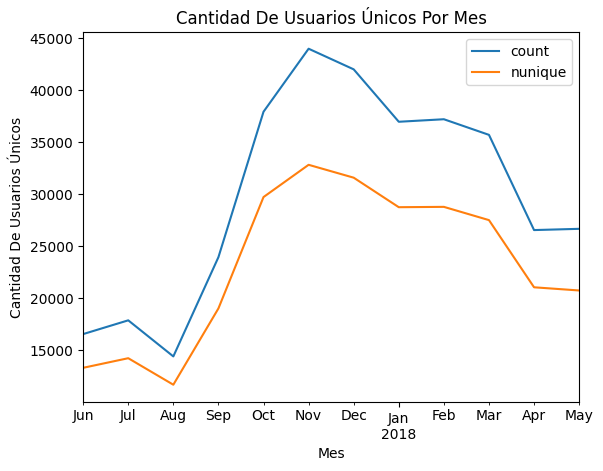

In [169]:
#usuarios mensuales;

monthly_users = visits.groupby(visits['start_ts'].dt.to_period('M'))['uid'].agg(['count','nunique'])
print("Usuarios mensuales:\n", monthly_users)

monthly_users.plot(kind='line')
plt.title('Cantidad De Usuarios Únicos Por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad De Usuarios Únicos')
plt.show()



- a partir del mes de agosto del 2017 inicia un proceso de crecimiento en el inicio de sesión de los usuarios; 

- definitivamente el mes mas concurrido es noviembre después de allí comienza un incremento importante en la interactividad de los usuarios con la plataforma;

- ya luego desciende un poco hasta obtener una constante ligera en las plataformas;

- las plataformas se quedaron en el inicio; no innovaron, salieron nuevas al mercado generando un fuerte impacto en los usuarios, era tiempo de vacaciones para los usuarios intervenir en las sesiones; todo lo mencionado pudo haber jugado en contra de el decrecimiento del uso de sesiones en ciertas temporadas del año.


Sesiones diarias:
        start_ts   uid
0    2017-06-01   664
1    2017-06-02   658
2    2017-06-03   477
3    2017-06-04   510
4    2017-06-05   893
..          ...   ...
359  2018-05-27   672
360  2018-05-28  1156
361  2018-05-29  1035
362  2018-05-30  1410
363  2018-05-31  2256

[364 rows x 2 columns]


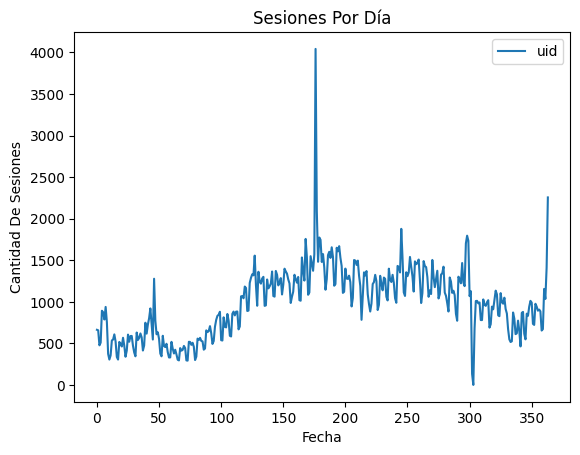

In [170]:
# 2. ¿Cuántas sesiones hay por día?
daily_sessions = visits.groupby(visits['start_ts'].dt.date)['uid'].count().reset_index()
print("Sesiones diarias:\n", daily_sessions)

daily_sessions.plot(kind='line')
plt.title('Sesiones Por Día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad De Sesiones')
plt.show()


In [171]:
# 3. ¿Cuál es la duración de cada sesión?
visits['session_duration'] = (visits['end_ts']-visits['start_ts']).astype('timedelta64[m]')  # Duración en minutos
average_duration = visits['session_duration'].mean()
median_duration = visits['session_duration'].median()

print(visits['session_duration'])
print()
print("Duración promedio de sesión (min):", average_duration)
print("Duración mediana de sesión (min):", median_duration)


0         18.0
1         28.0
2          0.0
3         24.0
4          0.0
          ... 
359395     0.0
359396     0.0
359397     0.0
359398     0.0
359399     0.0
Name: session_duration, Length: 359400, dtype: float64

Duración promedio de sesión (min): 10.716329994435169
Duración mediana de sesión (min): 5.0


In [172]:
# 4. ¿Con qué frecuencia los usuarios regresan?
visits['start_ts']=pd.to_datetime(visits['start_ts'], format='%Y-%m-%d %H:%M')
visits['month']=visits['start_ts'].dt.month
frecuency_day=visits.groupby(['uid','month'])['start_ts'].agg('count')
print(frecuency_day.tail(30))



uid                   month
18445456946869452085  1        1
                      2        1
                      12       1
18445531342805393415  10       1
18445601152732270159  3        1
                      8        1
                      10       1
18445670737855705729  2        1
18445722305371387073  3        1
18445747027901320564  11       1
18445867588706195862  6        1
18445883325006294312  12       1
18445884613277162497  11       2
                      12       1
18445952482630424767  9        1
18445989073663295960  2        1
18446081852968332494  10       1
18446085545761680279  10       1
18446104389491815722  3        2
18446120301360161958  7        1
18446156210226471712  2        5
                      11       2
18446167067214817906  10       2
18446316582013423015  2        1
18446403737806311543  11       1
18446424184725333426  12       1
18446556406699109058  1        1
18446621818809592527  5        1
                      12       1
184466760307856

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Excelente trabajo en esta sección. Has cubierto varios aspectos importantes del análisis de visitas, incluidos usuarios únicos, sesiones y duración de sesiones. Aquí algunos puntos destacados:

Análisis Temporal: El desglose por día, semana y mes está bien implementado y proporciona información útil sobre el comportamiento de los usuarios a lo largo del tiempo.
Visualización: Los gráficos son claros, bien etiquetados y complementan el análisis. Ayudan a identificar tendencias y patrones de interacción.
Cálculo de Duración de Sesiones: La adición de la columna session_duration es un paso crucial para evaluar la experiencia del usuario en la plataforma.
Frecuencia de Retorno: El enfoque para medir la frecuencia con la que los usuarios regresan es interesante y puede proporcionar información valiosa para estrategias de retención.

</div> 

# Ventas:

- ¿Cuándo empieza la gente a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.)


In [173]:
# ¿Cuándo empieza la gente a comprar?
orders['buy_ts']=orders['buy_ts'].dt.date
buys_first=orders.groupby('uid')['buy_ts'].min().reset_index()
buys_first.columns=['uid', 'buys_first_ts']
print(buys_first)

                        uid buys_first_ts
0           313578113262317    2018-01-03
1          1575281904278712    2017-06-03
2          2429014661409475    2017-10-11
3          2464366381792757    2018-01-28
4          2551852515556206    2017-11-24
...                     ...           ...
36518  18445147675727495770    2017-11-24
36519  18445407535914413204    2017-09-22
36520  18445601152732270159    2018-03-26
36521  18446156210226471712    2018-02-18
36522  18446167067214817906    2017-10-17

[36523 rows x 2 columns]


        uid
month      
1      4721
2      5281
3      5326
4      3273
5      4346
6      2355
7      2363
8      1807
9      3387
10     5679
11     5659
12     6218


Text(0.5, 1.0, 'Pedidos Por Mes')

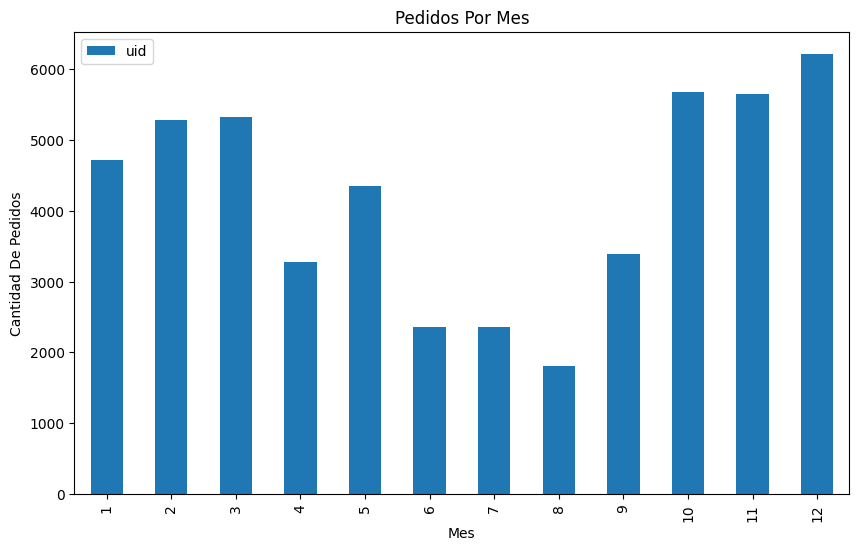

In [174]:
#- ¿Cuántos pedidos hacen durante un período de tiempo dado?
orders['buy_ts']=pd.to_datetime(orders['buy_ts'], format='%Y-%m-%d %H:%M')
orders['month']=orders['buy_ts'].dt.month
order_month=orders.groupby(['month']).agg({'uid':'count'})
print(order_month)

order_month.plot(kind='bar',figsize=(10,6))
plt.xlabel('Mes')
plt.ylabel('Cantidad De Pedidos')
plt.title('Pedidos Por Mes')

- Bueno la gráfica es muy diciente, los tres primeros y últimos meses del año, tuvo mayor cantidad de ventas; siendo diciembre el mes con mayor cantidad de ventas... épocas vacaionales tal vez, o quizas ofertas como estrategias de marketing para atraer más clientes; aunque en la mitad del año de lado y lado las ventas se redujeron, sin embargo hubo ventas.

In [175]:
# ¿Cuál es el tamaño promedio de compra?
# vamos a calucular el promedio por usuario
mean_users=orders.groupby('uid')['revenue'].mean()
print(mean_users)

uid
313578113262317          0.550000
1575281904278712         1.525000
2429014661409475        73.330000
2464366381792757         2.440000
2551852515556206         5.495000
                          ...    
18445147675727495770     3.050000
18445407535914413204     0.293333
18445601152732270159     4.220000
18446156210226471712     9.780000
18446167067214817906     7.940000
Name: revenue, Length: 36523, dtype: float64


In [176]:
# ¿Cuánto dinero traen? (LTV).

buys_users=orders.groupby('uid')['revenue'].sum()
mean_buys=buys_users.mean()
frecuency_buys=orders.groupby('uid')['revenue'].count()
retention=(mean_buys > 1).mean()
ltv=(mean_buys * frecuency_buys.mean())/(1-retention)
print(buys_users)



uid
313578113262317          0.55
1575281904278712         3.05
2429014661409475        73.33
2464366381792757         2.44
2551852515556206        10.99
                        ...  
18445147675727495770     3.05
18445407535914413204     0.88
18445601152732270159     4.22
18446156210226471712     9.78
18446167067214817906     7.94
Name: revenue, Length: 36523, dtype: float64


/tmp/ipykernel_31/2907776257.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  ltv=(mean_buys * frecuency_buys.mean())/(1-retention)



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Esta sección está bien estructurada y aborda de manera clara los aspectos clave relacionados con las ventas. Los cálculos y visualizaciones son efectivos y proporcionan información valiosa sobre el comportamiento de los usuarios. Aquí algunos puntos destacados:
  
1. **Inicio de Compras:** Identificar la primera compra por usuario es una excelente práctica para segmentar cohortes y evaluar conversiones.
2. **Análisis Temporal:** El desglose de pedidos mensuales y el uso de gráficos permiten visualizar tendencias estacionales y patrones de compra.
3. **Cálculo del LTV:** La implementación de esta métrica es un punto fuerte, ya que es crucial para evaluar la rentabilidad y las estrategias de adquisición de clientes.

</div>



# Marketing:
 



In [177]:
# ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo) 
#gasto total
total_costs=costs['costs'].sum()
print(total_costs)

#gasto por fuente de adquisición
acquisition_source=costs.groupby('source_id')['costs'].sum()
print(acquisition_source)

#gasto por fecha
costs_td=costs.groupby('dt')['costs'].sum()
print(costs_td)

#cual es la fuente de adquisisción que más gasta.
more_acquisition=acquisition_source.sort_values(ascending=False).head(1)
print(more_acquisition)

#cuál es la fecha en la que se gastó más dinero?
more_costs=costs_td.sort_values(ascending=False).head(1)
print(more_costs)

329131.62
source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64
dt
2017-06-01     735.26
2017-06-02     721.19
2017-06-03     450.85
2017-06-04     761.16
2017-06-05     821.44
               ...   
2018-05-27     532.87
2018-05-28     619.44
2018-05-29     784.79
2018-05-30    1183.00
2018-05-31    2153.70
Name: costs, Length: 364, dtype: float64
source_id
3    141321.63
Name: costs, dtype: float64
dt
2017-11-24    3458.86
Name: costs, dtype: float64


source_id
1     1.096546
2     1.631017
3     1.890439
4     0.731201
5     0.908434
6          NaN
7          NaN
9     0.595584
10    0.721766
dtype: float64


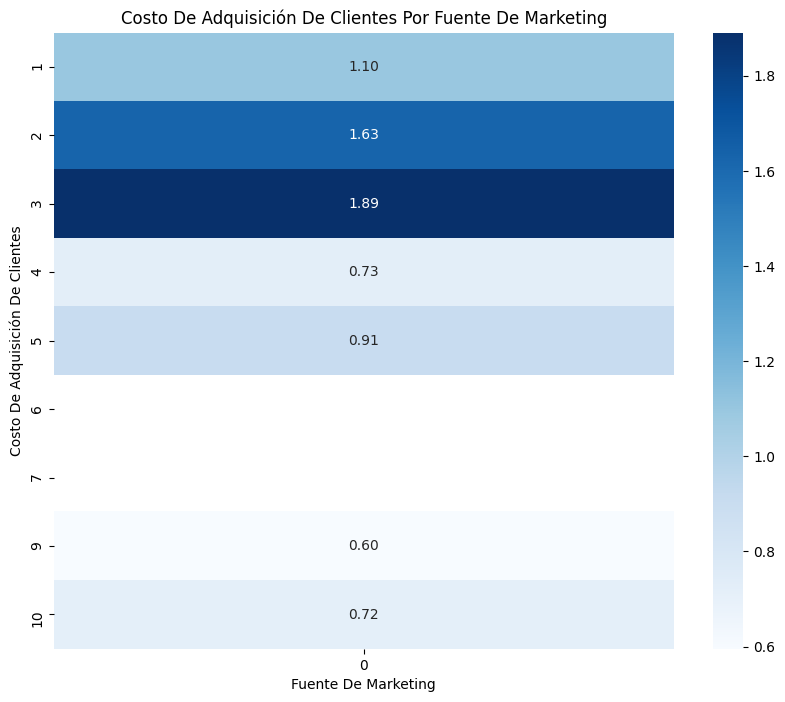

In [178]:
# ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?
#vamos a calcular el número de clientes adquiridos ya que hace un momento calculamos el gasto por fuente.

users_costs=visits.groupby('source_id')['uid'].nunique()
costs_acquisition=acquisition_source/users_costs
print(costs_acquisition)

plt.figure(figsize=(10,8))
sns.heatmap(costs_acquisition.to_frame(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Costo De Adquisición De Clientes Por Fuente De Marketing')
plt.xlabel('Fuente De Marketing')
plt.ylabel('Costo De Adquisición De Clientes')
plt.show()


- Este grafico es muy importante en la interpretación de nuestro resultado ya que de una manera práctica y sencilla nos ayuda  a visuzalizar el comportamiento del cliente frente a la inversión que se viene realizando a cada uno;
- las fuentes de marketing(0.73,1.4) nos indica que un cliente nos esta costando menos dinero, (1.89,1.63)(1.10), estás últimas ya un poco mas altas nos indica que nos cuesta más dinero adquirir un cliente; en terminos generales la mayoria de la inversión parece que nos cuesta menos por cliente sin embargo debebmos buscar el punto de equilibrio para tener una rentabilidad cconsiderable o por lo menos que no nos cueste más.

In [179]:
#unir los df 
visits_orders=pd.merge(visits, orders, on='uid')

#ingreso generado por cada fuente
ingreso_fuente=visits_orders.groupby('source_id')['buy_ts'].count()

# usamos la variable acquisition_source

#  ¿Cuán rentables eran las inversiones? (ROMI)
romi=(ingreso_fuente-acquisition_source)/acquisition_source
    
print(romi)


source_id
1     10.935812
2      4.566901
3     -0.669081
4      0.026352
5      1.933395
7           NaN
9      0.730316
10    -0.308372
dtype: float64


- En terminos generales 8 de los 18 identificadores tienen un ROMI positivo, lo que indica que la inversión en marketing ha sido rentable para la mayoría de losmproductos,
- 2 identificadores tienen un ROMI negativo, lo que indica lo que indica que la inversión en marketing ha generado pérdidas para éstos.
- para los identificadorres con un ROMI alto podría considerarse como oprtunidad para aumentar la inversión en marketing y aprovechar su potencial de crecimiento; en cuanto al ROMI bajo requiere una revisión de la estrategia de marketing para mejorar su rentabilidad.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Esta sección sobre marketing aborda de manera efectiva los aspectos clave relacionados con los costos y la rentabilidad. Aquí algunos puntos destacados:

1. **Cálculo de Costos:** Los cálculos del gasto total, por fuente de adquisición y a lo largo del tiempo están correctamente implementados y son esenciales para evaluar la efectividad de las inversiones.
2. **Costo de Adquisición por Cliente:** La relación entre el gasto por fuente y los usuarios adquiridos es una métrica fundamental y está bien visualizada con un mapa de calor.
3. **Cálculo del ROMI:** La fórmula para calcular la rentabilidad de las inversiones en marketing está correctamente implementada y proporciona información valiosa sobre qué fuentes son más rentables.

</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Atención</b> ⚠️ - Aunque los cálculos son correctos, hay áreas que podrían mejorarse:

1. **Interpretación de Resultados:** Podrías profundizar más en las observaciones del ROMI. Por ejemplo, ¿qué características tienen las fuentes con ROMI positivo que podrían replicarse en otras? ¿Qué estrategias específicas podrían mejorar las fuentes con ROMI negativo?
2. **Automatización del Código:** El código para calcular métricas repetidas, como los costos y el ROMI, podría simplificarse mediante funciones. Esto lo haría más limpio y escalable.
3. **Visualizaciones Complementarias:** Además del mapa de calor, podrías incluir gráficos de barras o líneas para mostrar cómo los costos y la rentabilidad cambian a lo largo del tiempo o entre fuentes.
4. **Unión de DataFrames:** Explica más claramente cómo la combinación de `visits` y `orders` contribuye al análisis del ROMI. Esto ayudaría a otros a entender la lógica detrás de las métricas calculadas.

</div>



# conclusión General
- Inicialmente verificamos la organización de los datos, bajo distintos métodos para comprobar valores ausentes con la función  .isnull (null); valores duplicados con duplicated(), tipología de datos correspondientes al contenido de cada columna, al verificar lo anterior y corregirlos de ser necesario, damos inicio al proyecto de acuerdo a la solicitud del mismo, para analizar el comportamiento de los clientes frente al producto y finalmente determinar el margen de inversióon en el área de marketing mediante el cálculo de distintas métricas, también la ilustración de diferentes gráficos que nos ayuda a interpretar  la información más clara y concisa y de una manera mas práctica.


### Comentario Final del Revisor

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Felicidades! Tu proyecto está **aprobado** y refleja un trabajo sólido y bien estructurado en el análisis de datos, con un enfoque claro en las métricas clave para evaluar el comportamiento de usuarios y la efectividad del marketing. Aquí algunos puntos destacados y recomendaciones finales:

---

#### **Puntos Positivos**
1. **Preparación de Datos:** Realizaste un excelente trabajo limpiando y organizando los datos, asegurando que fueran consistentes y utilizables para el análisis.
2. **Análisis Completo:** Cubriste todos los aspectos relevantes, desde visitas y ventas hasta costos y rentabilidad, lo que brinda una visión integral del comportamiento del cliente y las inversiones.
3. **Visualizaciones:** Los gráficos son claros y bien etiquetados, lo que facilita la interpretación de las tendencias y patrones identificados.
4. **Cálculo de Métricas Avanzadas:** Implementaste métricas clave como LTV, costo de adquisición y ROMI, mostrando un buen entendimiento de los conceptos de negocio y marketing.

---

#### **Recomendaciones**
1. **Interpretación de Resultados:** Podrías expandir las conclusiones con observaciones más detalladas y recomendaciones prácticas basadas en los datos. Por ejemplo, sugerir estrategias para mejorar las fuentes con ROMI negativo o potenciar las más rentables.
2. **Automatización del Código:** Usar funciones o bucles para cálculos repetidos (como análisis temporal o métricas por fuente) haría tu código más limpio y escalable.
3. **Análisis de Cohortes:** Explorar cohortes basadas en la fecha de adquisición o el comportamiento de compra podría ofrecer información adicional sobre la retención de clientes y su impacto en los ingresos.
4. **Visualizaciones Adicionales:** Considera incluir gráficos como histogramas o diagramas de caja para mostrar distribuciones de métricas clave como tamaños de compra o duración de sesiones.

---

#### **Conclusión General**
Tu proyecto demuestra un excelente dominio de herramientas analíticas y un enfoque claro en la resolución de problemas de negocio. Has logrado conectar los datos con objetivos prácticos y métricas accionables, lo que es un gran logro. 

¡Sigue así! Estoy seguro de que continuarás desarrollando proyectos de alta calidad en el futuro. 🚀😊

</div> 